# 1.Simple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


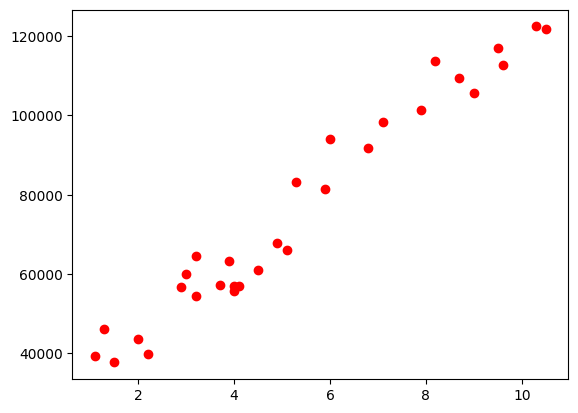

In [ ]:
plt.scatter(X, y, color = 'red')

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)

## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_cap = regressor.predict(X_test)

## Visualising the Test set results

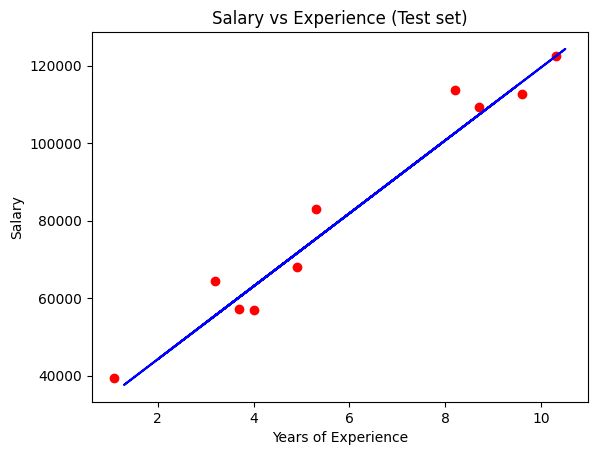

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_cap_train = regressor.predict(X_train)
y_cap_test = regressor.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_cap_train))
error_test = np.sqrt(mean_squared_error(y_test, y_cap_test))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  5458.31119325593
RMSE for test =  5941.540110706558


In [ ]:
from sklearn.metrics import r2_score
#R2=1-RSS/TSS
r2_test = r2_score(y_train, y_cap_train)

print('R2 for test = ', r2_test)

R2 for test =  0.9549236946181227


# ===========================================================

## Addressing Underfitting

To tackle the challenge of underfitting, it's beneficial to **enhance the model's complexity**. One method is by introducing higher-degree terms derived from the base features.

For example, a straightforward linear equation:
$$ Y = \theta_0 + \theta_1x $$

Can be extended to:
$$ Y = \theta_0 + \theta_1x + \theta_2x^2 $$

It's essential to understand that even with the inclusion of a quadratic term, this equation is still classified as a linear model. The reason is that the **coefficients or weights** associated with the features remain linear. The term \( x^2 \) simply acts as an added feature. However, the resulting shape we aim to model is quadratic.

To perform this transformation of initial features into their higher degrees, one can use the `PolynomialFeatures` class from `scikit-learn`. Following this, the **Linear Regression** method can be applied to train the model.


# 2.Polynomial Regression

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


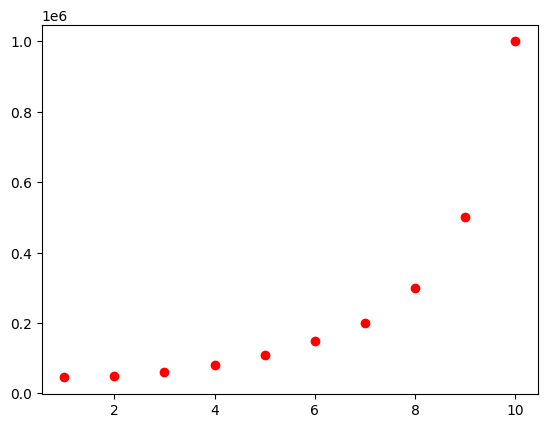

In [ ]:
plt.scatter(X, y, color = 'red')

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

## Visualising the Linear Regression results

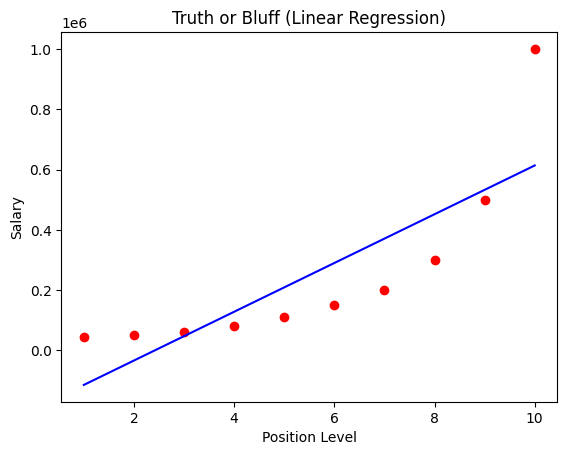

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)


In [ ]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Polynomial Regression results

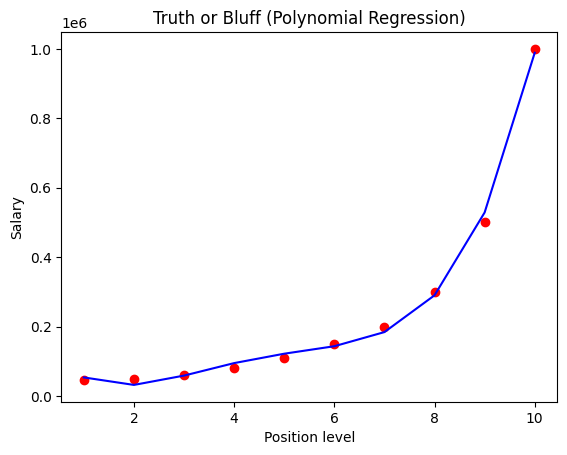

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# ===========================================================

# 3.Multiple Linear Regression

## Importing the libraries

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_tr = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
error_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  9031.666612578969
RMSE for test =  9137.9901527941


In [ ]:

from sklearn.metrics import r2_score

# Predictions have already been made using:
# y_pred_tr = regressor.predict(X_train)
# y_pred = regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_tr)
r2_test = r2_score(y_test, y_pred)

print('R2 for train = ', r2_train)
print('R2 for test = ', r2_test)

R2 for train =  0.9501847627493607
R2 for test =  0.9347068473282546


## Regularization

1. Lasso Regression (L1 Regularization)
Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients.

Formula:
The objective function for Lasso regression can be represented as:
$$
\min_{\beta} \left( \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T \beta)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
$$
Where:

- β are the coefficients.
- λ is the regularization strength.
- N is the number of samples.
- p is the number of features.


In [ ]:
from sklearn.linear_model import Lasso

# Define the Lasso regressor with specified lambda (alpha here)
lasso_regressor = Lasso(alpha=1.0) # You can adjust the alpha value
lasso_regressor.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_regressor.predict(X_test)


In [ ]:

from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_lasso)

print('R2 for test = ', r2_test)

R2 for test =  0.9749148425688454


2. Ridge Regression (L2 Regularization)
Ridge regression adds a penalty equal to the square of the magnitude of coefficients.

Formula:
The objective function for Ridge regression can be represented as
$$
\min_{\beta} \left( \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right)
$$
Where:

- β are the coefficients.
- λ is the regularization strength.
- N is the number of samples.
- p is the number of features.

Both Lasso and Ridge regression are used to prevent overfitting in the model. Lasso regression can lead to zero coefficients (i.e., it can exclude some features), while Ridge regression will include all the features but the magnitudes of some coefficients may be very small. Adjusting the λ (or alpha in the code) will change the strength of the regularization, with higher values leading to stronger regularization.

In [ ]:
from sklearn.linear_model import Ridge

# Define the Ridge regressor with specified lambda (alpha here)
ridge_regressor = Ridge(alpha=1.0) # You can adjust the alpha value
ridge_regressor.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_regressor.predict(X_test)


In [ ]:

from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_ridge)

print('R2 for test = ', r2_test)

R2 for test =  0.9745658764217822


Here are some general guidelines:

### When to use Ridge Regression:
1. Multicollinearity:
    
    Ridge is especially useful when there's multicollinearity in the dataset, which means that independent variables are highly correlated. In such cases, the least squares estimates become highly sensitive to random errors in the observed responses, leading to large variances and overfitting. Ridge regression adds a degree of bias to the regression estimates, which can lead to more accurate predictions when multicollinearity is present.

2. Number of Features:
    
    If you have a lot of features and none are believed to be irrelevant, i.e., all features should be included in the model, Ridge might be a better choice. It will include all the features but will shrink the coefficients towards zero, thus minimizing their effect without completely eliminating them.

### When to use Lasso Regression:

1. Feature Selection:
    
    One of the primary uses of Lasso regression is in feature selection. Lasso can drive some feature coefficients exactly to zero, effectively excluding them from the model. If you believe that many features are irrelevant or redundant, Lasso might be a better choice.

2. High-Dimensionality:
    
    In situations where you have more features than observations (p > n), Lasso can be a good choice as it will help in reducing the model complexity.

3. Interpretable Model:
    
    Since Lasso can set some coefficients to zero, you end up with a simpler and more interpretable model with fewer features.


###Lab Task
1. Read the CSV file into pandas dataframe
2. Explore the data and do any needed preprocessing (encoding, filling missing values...etc.)
3. Split the data to train and test
4. Apply Regression model from sklearn
5. Evaluate the model

In [ ]:
dataset = pd.read_csv('Student_Performance.csv')
X =
y =
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
#encode Activities column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 7, 99, 9, 1],
       [1.0, 0.0, 4, 82, 4, 2],
       [0.0, 1.0, 8, 51, 7, 2],
       ...,
       [0.0, 1.0, 6, 83, 8, 5],
       [0.0, 1.0, 9, 97, 7, 0],
       [1.0, 0.0, 7, 74, 8, 1]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =

In [ ]:
#train the regression model

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_tr = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
error_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  2.040624526940105
RMSE for test =  2.0262302968408665


In [ ]:
from sklearn.metrics import r2_score
#calculate the R2 score